# Using linear-regression to analysis auto-mpg dataset
---

*The dataset used here 'auto-mpg.data' that is available in the UCIMachine Learning Repository:
<br>
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

---

### Import the dataset
**Note:** Try edit the import directory if you cannot import the dataset.

In [23]:
# Read the saved dataset into pandas dataframe.
import pandas as pd
df = pd.read_csv('./auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [2]:
# Have a overlook on row# and col# of the dataset
df.shape

(398, 9)

In [3]:
# Display the first 5 rows of the dataframe.
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


---

### Preprocess the data
This part works to drop some rows which have unsure values (?) in it.
<br>
**Notice:** do not compile this section twice，since some rows were already droped during the first compile.

In [4]:
labeled_row = 0
for i in range(len(df)):
    if df['horsepower'].iloc[i] == '?':
        labeled_row += 1

print("The number of missinng data is:", labeled_row, end = "\n")
print("The percentage of missing data among all datas under the 'horsepower' label is: {:.2%}" .format(labeled_row/398), end = "\n")

The number of missinng data is: 6
The percentage of missing data among all datas under the 'horsepower' label is: 1.51%


In [5]:
# Drop all rows which cotain unsure values (?).
df.drop(df[df.horsepower == '?'].index, inplace=True)

<br>

---

### Car manufacturers distribution
This part aims to extract the names of different car manufacturers from the 'car_name' feature column.
<br>
Then generate a plot of the number of cars that belong to these different car manufacturers.
<br>
<br>
The first step is to preprocess the data, merge those misspelled names to correct names, 
<br>
and then count the number of cars in different car manufacturers.

In [6]:
# The first word is truncated from all the data under the 'car_name' tag.
# Put all the intercepted data into the list.
car_makers = []
for i in df['car_name']:
    car_makers.append(i.split()[0])

# Filter out all duplicate data so that each car maker appears only once.
labels = []
for i in car_makers:
    if i not in labels:
        labels.append(i)

# Check the number of occurrences of each car maker.
maker_num = []
for i in labels:
    value = car_makers.count(i)
    maker_num.append(value)
    
# Manually collate data.
# Because some car makers' names are misspelled.
labels.pop(14)
labels.pop(-9)
maker_num[0] = maker_num[0] + maker_num[14] + maker_num[-9]
maker_num.pop(14)
maker_num.pop(-9)

labels.pop(-4)
maker_num[-6] = maker_num[-6] + maker_num[-4]
maker_num.pop(-4)

labels.pop(-10)
maker_num[-14] = maker_num[-14] + maker_num[-10]
maker_num.pop(-10)

labels.pop(-10)
maker_num[8] = maker_num[8] + maker_num[-10]
maker_num.pop(-10)

labels.pop(-3)
maker_num[10] = maker_num[10] + maker_num[-3]
maker_num.pop(-3)

labels.pop(-6)
maker_num[16] = maker_num[16] + maker_num[-6]
maker_num.pop(-6)

tf = True
for i in range(len(labels)):
    print("%s have %d cars." %(labels[i], maker_num[i]))


chevrolet have 47 cars.
buick have 17 cars.
plymouth have 31 cars.
amc have 27 cars.
ford have 48 cars.
pontiac have 16 cars.
dodge have 28 cars.
toyota have 25 cars.
datsun have 24 cars.
volkswagen have 15 cars.
peugeot have 9 cars.
audi have 7 cars.
saab have 4 cars.
bmw have 2 cars.
hi have 1 cars.
mercury have 11 cars.
opel have 5 cars.
fiat have 8 cars.
oldsmobile have 10 cars.
chrysler have 6 cars.
mazda have 12 cars.
volvo have 6 cars.
renault have 3 cars.
honda have 13 cars.
subaru have 4 cars.
vw have 6 cars.
mercedes-benz have 3 cars.
cadillac have 2 cars.
triumph have 1 cars.
nissan have 1 cars.


The second step is to plot a bar chart to indicate the distribution of the number make of a car more clearly.
<br>
The specific number make of each car are printed above.

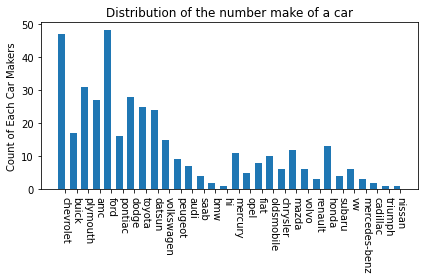

In [7]:
# Plot part.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, maker_num, width)

ax.set_ylabel('Count of Each Car Makers')
ax.set_title('Distribution of the number make of a car')
ax.set_xticks(x)
plt.xticks(rotation = 270)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

---

### Classify the cars into 3 categories: light, medium, heavy
This part works to generate two thresholds that divides the 'weight' values into three intervals.
<br>
Three intervals are: light, medium, and heavy.

In [8]:
df_copy = df['weight'].copy(deep=True) # Make a deep copy of the dataframe.
weight_array = df_copy.values # Convert the copied df to an array.
weight_array.sort() # Sort the array with ascending order.

# Produce three intervals accoding to the range of weight.
interval = (weight_array[len(weight_array) - 1] - weight_array[0])/3

# Generate two thresholds that divides the 'weight' data.
first_threshold = weight_array[0] + interval
second_threshold = weight_array[0] + interval + interval

# Output
print("The first threshold is %.1f (kg)." %first_threshold, end = "\n")
print("The second threshold is %.1f (kg)." %second_threshold, end = "\n")
print("", end = "\n")
print("The 'light' category is from %.1f (kg) to %.1f (kg)." %(weight_array[0], first_threshold), end = "\n")
print("The 'medium' category is from %.1f (kg) to %.1f (kg)." %(first_threshold, second_threshold), end = "\n")
print("The 'heavy' category is from %.1f (kg) to %.1f (kg)." %(second_threshold, weight_array[len(weight_array) - 1]), end = "\n")

The first threshold is 2788.7 (kg).
The second threshold is 3964.3 (kg).

The 'light' category is from 1613.0 (kg) to 2788.7 (kg).
The 'medium' category is from 2788.7 (kg) to 3964.3 (kg).
The 'heavy' category is from 3964.3 (kg) to 5140.0 (kg).


Calculate number of cars in each category.
<br>
This helps to understand cars in which weight is the most abundant.

In [9]:
num_light = 0
num_medium = 0
num_heavy = 0
for i in weight_array:
    if i < first_threshold:
        num_light += 1
    elif i < second_threshold:
        num_medium += 1
    elif i <= weight_array[len(weight_array) - 1]:
        num_heavy += 1

num_list = [num_light, num_medium, num_heavy]
threshold_list = [weight_array[0], first_threshold, second_threshold, weight_array[len(weight_array) - 1]]

print("There are %d 'light' cars." %num_list[0])
print("There are %d 'medium' cars." %num_list[1])
print("There are %d 'heavy' cars." %num_list[2])

There are 192 'light' cars.
There are 135 'medium' cars.
There are 65 'heavy' cars.


Then plot the data in a histogram.
<br>
From left to right, accordingly, are Light, Medium, and Heavy categories.
<br>
The specific numbers of cars in each category are outputed above.

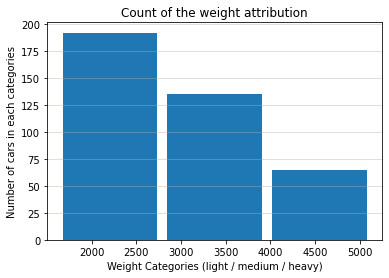

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.hist(weight_array, bins = threshold_list, rwidth=0.9) # rwidth: width of bars.
plt.grid(axis='y', alpha=0.5) # Add horizontal lines on the graph.
plt.xlabel('Weight Categories (light / medium / heavy)')
plt.ylabel('Number of cars in each categories')
plt.title('Count of the weight attribution')
plt.show()

 <br>

---

### Using seaborn heatmap indicating the relationship among features
Take an overlook of the dataset's features and find if any features are too similar with each other.
<br>
Too similar features are redundant for making predictions,
<br>
and this is going to set the stage for the linear regression prediction in next step.

<AxesSubplot:>

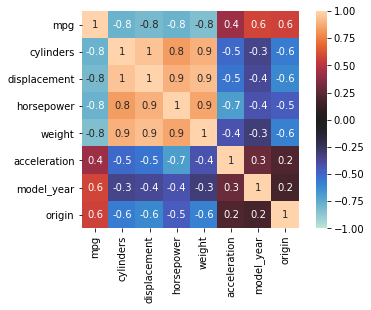

In [11]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Firstly convert data in 'horsepower' from string to numeric.
# Since Seaborn Heatmap gonna ignore string type of data.
df['horsepower'] = pd.to_numeric(df['horsepower'])

# annot: display the correlation coefficient.
# vmin,vmax,center: adjust the color bar.
# square: make each color unit square.
sns.heatmap(df.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0,  square=True)

**Discovery from the heatmap:** According to the seaborn heatmap, the intersection between 'cylinders' and 'horsepower' shows the value of 0.8. This means the relationship between 'cylinders' and 'horsepower' is positive, that is, as 'cylinders' get higher value, 'horsepower' will also get a higher value. This matches my expectation because, in fact, a car with more cylinders has more horsepower.

<br>

---

### Linear regression solver on a single variable for prediction of 'weight'.
This part is about applying Linear Regression to the dataset.
<br>
<br>
Firstly, the data points are tiled on a two-dimensional plane.
<br>
This allows us to analyze the data more intuitively.
<br>
<br>
Predicting feature using here is 'horsepower' and 'weight' is the predicted feature.
<br>
A relation function will be generated to predict 'weight'.

<AxesSubplot:xlabel='horsepower', ylabel='weight'>

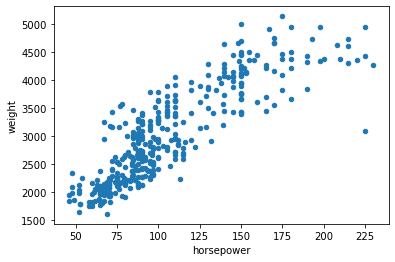

In [12]:
# Firstly, the data points are tiled on a two-dimensional plane. 
# This allows us to analyze the data more intuitively. 

# Features I am using here are 'horsepower' and 'weight'. 
# Feature is 'horsepower'; Predictor is 'weight'.
df.plot.scatter(x='horsepower', y='weight')

<br>

Using OLS Solution to Minimize RSS for linear regression.

In [13]:
import numpy as np
import pandas as pd

x = np.array(df['horsepower'])
y = np.array(df['weight'])

# Make a vector whose first sequence is all 1's
# Subscript#0, the value is always 1.
X = np.c_[np.ones(len(x)), x]

# OLS Solution to Minimize RSS for LR.
# w = (X^TX)^-1X^TY (OLS).
b = np.linalg.inv(X.T@X)@(X.T@y)

print("The weights are: ", b)

The weights are:  [984.50032677  19.07816155]


<br>

**In order to balance the underfitting problem and overfitting problem, order(degree) from n=1 to n=3 are respectively plotted. Linear regression solver on a single variable for prediction of 'weight'.**

The weights are:  [984.50032677  19.07816155]


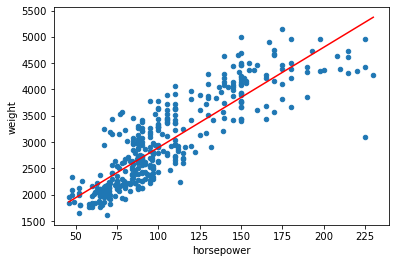

In [14]:
ax = df.plot.scatter(x='horsepower', y='weight')

import math
fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max())-math.floor(x.min()))
fy = b[0] + b[1] * fx

ax.plot(fx, fy, 'r')

print("The weights are: ", b)

>Plot the regression above with the first order, n = 1.
<br>
y = b0 + b1 x
<br>
Apparently, this is an unerfitting prediction.

The weights are:  [-2.03798198e+02  4.06768783e+01 -8.61956885e-02]


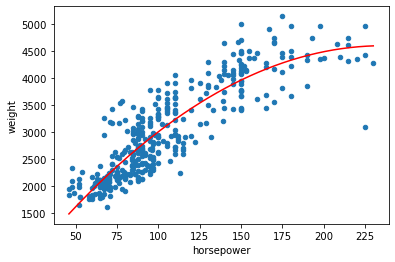

In [15]:
X = np.c_[np.ones(len(x)), x , np.square(x)]
b = np.linalg.inv(X.T@X)@(X.T@y)

fy = b[0] + b[1] * fx + b[2] * np.square(fx)

ax = df.plot.scatter(x='horsepower', y='weight')
ax.plot(fx, fy, 'r')

print("The weights are: ", b)

>Plot the regression above. The second order, n = 2. 
<br>
y = b0 + b1x + b2x^2
<br>
Still unerfitting problem.

The weights are:  [ 1.36177359e+03 -1.78963375e+00  2.64784301e-01 -8.87972652e-04]


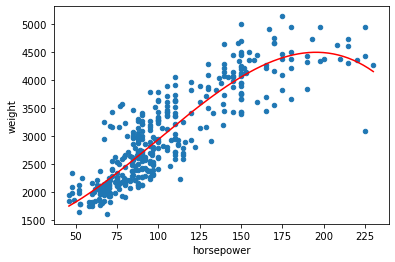

In [16]:
X = np.c_[np.ones(len(x)), x , np.square(x), np.power(x, 3)]
b = np.linalg.inv(X.T@X)@(X.T@y)

fy = b[0] + b[1]*fx + b[2]*np.square(fx) + b[3]*np.power(fx, 3)

ax = df.plot.scatter(x='horsepower', y='weight')
ax.plot(fx, fy, 'r')

print("The weights are: ", b)

>Plot the regression above. The second order, n = 3. 
<br>
y = b0 + b1x + b2x^2 + b3*x^3
<br>
Better, but still can be imporved.

The weights are:  [ 8.21927206e+03 -3.58297337e+02  7.56635124e+00 -7.67747983e-02
  4.25050336e-04 -1.22409480e-06  1.42327433e-09]


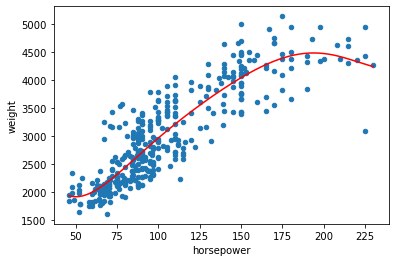

In [17]:
X = np.c_[np.ones(len(x)), x , np.square(x), np.power(x, 3), np.power(x, 4), np.power(x, 5), np.power(x, 6)]
b = np.linalg.inv(X.T@X)@(X.T@y)

fy = b[0] + b[1]*fx + b[2]*np.square(fx) + b[3]*np.power(fx, 3) + b[4]*np.power(fx, 4) + b[5]*np.power(fx, 5) + b[6]*np.power(fx, 6)

ax = df.plot.scatter(x='horsepower', y='weight')
ax.plot(fx, fy, 'r')

print("The weights are: ", b)

>Plot the regression above. The sixth order, n = 6. 
<br>
Loooks like a balanced model.

The weights are:  [-4.90125703e+04  5.27009033e+03 -2.24300934e+02  5.18877554e+00
 -7.24804737e-02  6.39488368e-04 -3.58667489e-06  1.23949331e-08
 -2.40542404e-11  2.00483220e-14]


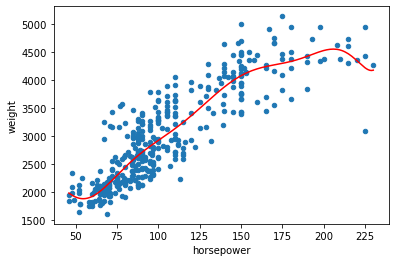

In [18]:
X = np.c_[np.ones(len(x)), x , np.square(x), np.power(x, 3), np.power(x, 4), np.power(x, 5), np.power(x, 6), np.power(x, 7), np.power(x, 8), np.power(x, 9)]
b = np.linalg.inv(X.T@X)@(X.T@y)

fy = b[0] + b[1]*fx + b[2]*np.square(fx) + b[3]*np.power(fx, 3) + b[4]*np.power(fx, 4) + b[5]*np.power(fx, 5) + b[6]*np.power(fx, 6) + b[7]*np.power(fx, 7) + b[8]*np.power(fx, 8) + b[9]*np.power(fx, 9)

ax = df.plot.scatter(x='horsepower', y='weight')
ax.plot(fx, fy, 'r')

print("The weights are: ", b)

>Plot the regression. The ninth order, n = 9.
<br>
This is overfitting problem.

<br>

Since the sixth order (n=6) best fits the data, so I use n = 6 here.

In [19]:
X = np.c_[np.ones(len(x)), x , np.square(x), np.power(x, 3), np.power(x, 4), np.power(x, 5), np.power(x, 6)]
b = np.linalg.inv(X.T@X)@(X.T@y)

x_0 = x[0]
y_0 = y[0]
pred = b[0] + b[1]*x_0 + b[2]*np.square(x_0) + b[3]*np.power(x_0, 3) + b[4]*np.power(x_0, 4) + b[5]*np.power(x_0, 5) + b[6]*np.power(x_0, 6)

print("The actural value is:", y_0)
print("The predicted value is: %.1f" %pred)
print("The weight#1 is: %.2f" %b[0])
print("The weight#2 is: %.2f" %b[1])
print("The weight#3 is: %.2f" %b[2])
print("The weight#4 is: %.2f" %b[3])
print("The weight#5 is: %.6f" %b[4])
print("The weight#6 is: %.6f" %b[5])
print("The weight#7 is: %.9f" %b[6])

The actural value is: 3504.0
The predicted value is: 3656.4
The weight#1 is: 8219.27
The weight#2 is: -358.30
The weight#3 is: 7.57
The weight#4 is: -0.08
The weight#5 is: 0.000425
The weight#6 is: -0.000001
The weight#7 is: 0.000000001


In [20]:
SE = (y_0 - pred) ** 2
print("The squared error is: %.2f" %SE)

The squared error is: 23237.64


In [21]:
SE = 0
for i in y:
    SE += (i - pred) ** 2
MSE = SE/len(y)

print("The mean squared error (MSE) is: %.2f" %MSE)

The mean squared error (MSE) is: 1180488.00
